<a href="https://colab.research.google.com/github/anadeleame/bioinfo-postgraduation/blob/main/Project_II_17_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Repair the bed file

In variant calling processes that use a bed with regions of interest, when changing the old pipeline to the most current version of Dragen's variant caller (Illumina), some variants stopped being called. This can happen for several reasons, however, in this case, it was the change in the methodology applied. When analyzing the bed in question, it was noted how much it was fragmented when compared to the exon locations. The bioinformatician opened the bed file and noticed that it had several repeated entries, in addition to overlapping positions. Create a script that removes the repeated entries and creates a single entry for lines that have this overlap.


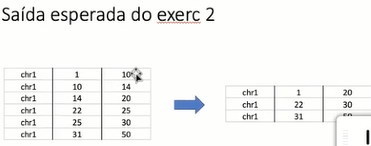

1. In the Linux terminal, remove the repeated lines from the messy_bed.bed file;
2. With the output file from the previous step, we will open the file. Also open an output file for the final result;
3. Iterate the open file;
4. In the first line, we must save, in a temporary variable, the values contained in the chr, start and end of the bed;
5. Starting from my second element (index 1) I will:
    
     5.1. Is the chr of the current index the same as the previous index?
- If so: go on;
- If not: save the following variables in an output file = chr_temp, start_temp, end_temp.
**It will treat the new values as if it were a new line, that is, save the current index chr in chr_temp, save the current start in start_temp, save the current end in end_temp and proceed normally to the next loop.
    
     5.2. Is the start of the current index less than or equal to the end of the previous index?
- If so: go on;
- If not: save the following variables in an output file = chr_temp, start_temp, end_temp.
**It will treat the new values as if it were a new line, that is, save the current index chr in chr_temp, save the current start in start_temp, save the current end in end_temp and proceed normally to the next loop.

     5.3. Is the end of the current index equal to or greater than the end of the previous index?
- If so: replace the temporary variable of end with the new end of the current index.

6. When finishing the treatment of all lines, possibly the last case was not saved in the final file. However, the temp variables still exist, so I must save the temp in the final file after the iteration loop.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving messy_bed.bed to messy_bed.bed


In [ ]:
%%bash

uniq messy_bed.bed > uniqbed.bed

In [ ]:
outputfile = open("not_messy.bed", "w")

with open("uniqbed.bed", "r") as file:
    first = 0
    for line in file:
        linevalues = line.split()
        if first  == 0 :
            chr_temp = linevalues[0]
            start_temp =linevalues[1]
            end_temp = linevalues[2]
            first = 1
        else:
            chr = linevalues[0]
            start = linevalues[1]
            end = linevalues[2]
            if chr == chr_temp:
                if start <= end_temp:
                    if end >= end_temp:
                          end_temp = end
                else:
                    outputfile.write(f"{chr_temp}\t{start_temp}\t{end_temp}\n")
                    chr_temp = chr
                    start_temp = start
                    end_temp = end
            else:
                outputfile.write(f"{chr_temp}\t{start_temp}\t{end_temp}\n")
                chr_temp = chr
                start_temp = start
                end_temp = end

outputfile.write(f"{chr_temp}\t{start_temp}\t{end_temp}\n")
outputfile.close()